In [20]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [21]:
# params
N = 1000
F = N
size=100

In [22]:
def gamma_wrapper(cor: float) -> BaseGenerator:
    return ga.Generator(F, size, cor, (2,4))

def mn_wrapper(cor: float) -> BaseGenerator:
    return mn.Generator2(F, size, cor, (5,7), (1,1))

In [23]:
%%timeit
fg = gamma_wrapper(0)

29.6 ms ± 4.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
fg = gamma_wrapper(0)
fg.generate_cloud_load_vectors()

40 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit
fm = mn_wrapper(0)


30.8 ms ± 4.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%%timeit
fm = mn_wrapper(0)
fm.generate_cloud_load_vectors()

39.9 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
def calc(wrapper, cor: float):
    generator = wrapper(cor)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

calc(gamma_wrapper, 0.5)

(0.450041758822581, 605295.1331191051)

In [28]:
cor_rng = np.arange(0, 1.01, 0.05)

In [29]:
%%time
repeats = 500
ga_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_ga, l_ga= calc(gamma_wrapper, cor)

        ga_res.append((cor, r_ga, l_ga))

CPU times: user 1h 5min 2s, sys: 1h 3min 35s, total: 2h 8min 37s
Wall time: 17min 40s


In [30]:
%%time
repeats = 500
mn_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_mn, l_mn = calc(mn_wrapper, cor)

        mn_res.append((cor, r_mn, l_mn))

CPU times: user 1h 5min 27s, sys: 1h 5min 26s, total: 2h 10min 53s
Wall time: 17min 53s


In [31]:
df_ga = pd.DataFrame(ga_res, columns=['expected', 'actual', 'load'])
df_mn = pd.DataFrame(mn_res, columns=['expected', 'actual', 'load'])

In [32]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})

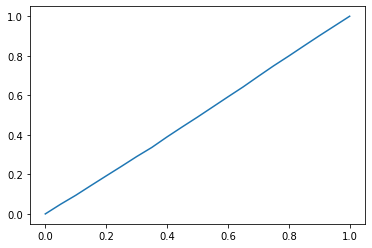

In [33]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

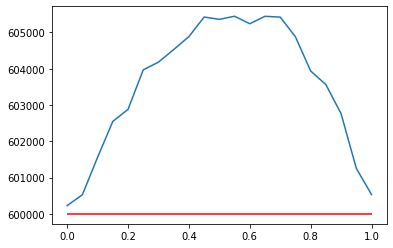

In [34]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, grped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

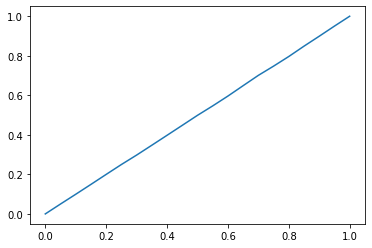

In [35]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

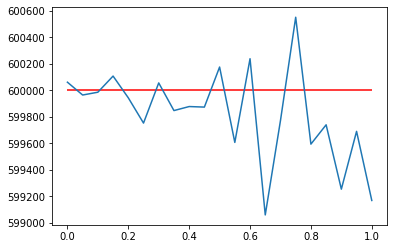

In [36]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, mnped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

In [37]:
grped

actual                           load                   
              mean count       std           mean count          std
expected                                                            
0.00      0.000246   500  0.000138  600229.203545   500  4018.248771
0.05      0.048966   500  0.006411  600528.935868   500  4047.682617
0.10      0.094375   500  0.012147  601560.945321   500  3852.216619
0.15      0.143751   500  0.016469  602548.065462   500  3836.406370
0.20      0.192407   500  0.022128  602881.421981   500  4116.562774
0.25      0.240653   500  0.025743  603969.864208   500  3936.961659
0.30      0.290060   500  0.027506  604181.381617   500  3886.070809
0.35      0.336479   500  0.030495  604528.944002   500  4350.207842
0.40      0.389701   500  0.029873  604884.887359   500  4095.490465
0.45      0.440343   500  0.031396  605424.743807   500  4555.706318
0.50      0.489891   500  0.032028  605360.594214   500  4463.125744
0.55      0.541006   500  0.029986  605446.269406   500  4185.946003
0.60      0.592170   500  0.027126  605239.891340   500  4288.848518
0.65      0.642535   500  0.025280  605444.540477   500  4210.658271
0.70      0.696239   500  0.021619  605422.722597   500  4356.625574
0.75      0.748957   500  0.018138  604880.182094   500  4193.654684
0.80      0.798812   500  0.014121  603938.396309   500  3919.401642
0.85      0.850205   500  0.009208  603562.592049   500  4382.513985
0.90      0.901032   500  0.005708  602760.821736   500  4116.799719
0.95      0.950486   500  0.002036  601255.435539   500  4267.530190
1.00      0.999939   500  0.000080  600533.449441   500  3911.455294

In [38]:
mnped

actual                               load                    
              mean count           std           mean count           std
expected                                                                 
0.00      0.000245   500  1.427899e-04  600059.614140   500   1889.886718
0.05      0.050343   500  7.043087e-03  599963.016049   500   2794.615848
0.10      0.099625   500  1.282234e-02  599984.204312   500   3828.458829
0.15      0.149604   500  1.799671e-02  600105.853674   500   4229.860655
0.20      0.200047   500  2.405189e-02  599942.028538   500   4747.901352
0.25      0.250086   500  2.719780e-02  599751.551376   500   5441.822985
0.30      0.297769   500  2.877921e-02  600054.164318   500   5827.600138
0.35      0.347647   500  3.271300e-02  599845.799604   500   6295.407897
0.40      0.397841   500  3.285340e-02  599876.145700   500   6654.315621
0.45      0.448232   500  3.478131e-02  599872.024574   500   6635.110022
0.50      0.498841   500  3.515947e-02  600173.969985   500   7658.578586
0.55      0.546557   500  3.309763e-02  599605.806070   500   7747.962010
0.60      0.596299   500  3.433891e-02  600236.661538   500   7950.850797
0.65      0.648837   500  3.223064e-02  599059.345837   500   8250.636287
0.70      0.701003   500  2.997672e-02  599770.583255   500   8712.563906
0.75      0.747625   500  2.574255e-02  600549.246516   500   8875.134535
0.80      0.796403   500  2.384257e-02  599592.893264   500   9540.148238
0.85      0.848685   500  1.902790e-02  599738.498856   500   9195.355763
0.90      0.898925   500  1.315388e-02  599253.455281   500   9607.829756
0.95      0.950105   500  6.628752e-03  599689.140978   500   9560.306271
1.00      1.000000   500  1.370979e-09  599168.237522   500  10105.456388